In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
import warnings
import torch.nn as nn #neural network
warnings.filterwarnings("ignore")

<a id="2"></a> <br>
### Doğrusal Regresyon (Linear Regression)
- Doğrusal regresyon, bir değişkenin diğer değişken tarafindan nasil etkilendiğini anlamamiza yardimci olan bir istatistiksel yöntemdir. Örneğin, bir araba şirketinin satişlarini inceleyelim. Araba fiyati düşük olduğunda, daha fazla araba satiyoruz. Araba fiyati yüksek olduğunda ise daha az araba satiyoruz. Bu, bildiğimiz bir gerçektir ve bu gerçekle ilgili bir veri setimiz vardir.

- Şimdi, sorumuz şu: Araba fiyati 100 birim olsaydi kaç araba satacağimizi tahmin edebilir miyiz? İşte doğrusal regresyon devreye giriyor. Bu yöntemi kullanarak, fiyat ve satişlar arasindaki ilişkiyi anlayabilir ve belirli bir fiyat için beklenen satiş miktarini tahmin edebiliriz.

- İşte doğrusal regresyon denklemini hatirlayalim: y = Ax + B. Burada, A eğrinin eğimi ve B ise y-eksenini kestiği noktadir. Yani, veri setimizi kullanarak doğrusal regresyon analizi yaparak, belirli bir fiyat için beklenen araba satişlarini tahmin edebiliriz. Bu da, işletmelerin kararlarini desteklemek için önemli bir araçtir.
- y = Ax + B.
    - A = Eğrinin eğimi
    - B = sapma (y-eksenini kesen nokta)



In [3]:
araba_fiyatlari = [3, 4, 5, 6, 7, 8, 9]
araba_fiyatlari_np = np.array(araba_fiyatlari, dtype=np.float32)
araba_fiyatlari_np = araba_fiyatlari_np.reshape(-1, 1)
araba_fiyatlari_tensor = Variable(torch.from_numpy(araba_fiyatlari_np))

In [4]:
satilan_araba_sayisi = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
satilan_araba_sayisi_np = np.array(satilan_araba_sayisi, dtype=np.float32)
satilan_araba_sayisi_np = satilan_araba_sayisi_np.reshape(-1, 1)
satilan_araba_sayisi_tensor = Variable(torch.from_numpy(satilan_araba_sayisi_np))

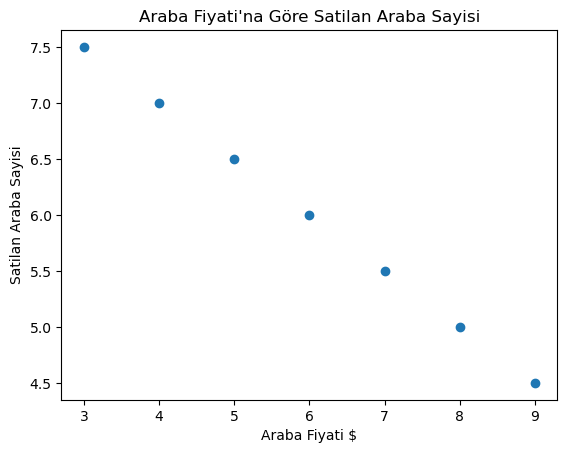

In [5]:
plt.scatter(araba_fiyatlari, satilan_araba_sayisi)
plt.xlabel("Araba Fiyati $")
plt.ylabel("Satilan Araba Sayisi")
plt.title("Araba Fiyati'na Göre Satilan Araba Sayisi")
plt.show()

Tabii, işte bu adımları daha açıklayıcı bir şekilde anlatarak çevirelim:

- Şimdi bu grafik bizim topladığımız verileri gösteriyor.
- Şimdi bir sorumuz var, araba fiyatı 100$ olduğunda kaç araba satılacak?
- Bu soruyu çözmek için doğrusal regresyon kullanmamız gerekiyor.
- Bu verilere bir çizgi yerleştirmemiz gerekiyor. Amaç, hatayı minimumda tutan bir çizgi yerleştirmek.
- **Doğrusal Regresyonun Adımları**
    1. DoğrusalRegresyon sınıfı oluştur
    1. Bu DoğrusalRegresyon sınıfından modeli tanımla
    1. MSE: Ortalama karesel hata
    1. Optimizasyon (SGD: stokastik gradyan inişi)
    1. Geriye Yayılım
    1. Tahmin

1. **Sınıf Oluşturma**:
   - `LineerRegresyon` adında bir sınıf oluşturuyoruz.
   - `__init__` fonksiyonu, sınıfın yapıcı fonksiyonudur. Bu fonksiyon, sınıfın başlatılmasını ve gerekli özelliklerin atanmasını sağlar.
       - Burada `super()` fonksiyonunu kullanarak `nn.Module`'den miras alıyoruz ve nn.Module'deki her şeye erişebiliyoruz.
       - `linear` adında bir nesne oluşturuyoruz ve bunu bir `nn.Linear` katmanına bağlıyoruz. Bu, doğrusal bir dönüşüm yaparak girdileri çıktılara dönüştüren bir katmandır.
   - `forward` fonksiyonu, ileri geçiş işlemi için tanımlanır. Bu, modelin girdiyi alıp çıktı ürettiği yerdir.

In [78]:
class LineerRegresyon(nn.Module):
    def __init__(self, input_size, output_size):
        super(LineerRegresyon, self).__init__()
        self.linear = nn.Linear(input_boyutu, output_boyutu)
    def forward(self, x):
        return self.linear(x)

2. **Modelin Tanımlanması**:
   - Girdi boyutu `input_boyutu = 1` ve çıktı boyutu `output_boyutu = 1` olarak belirlenir.
   - Model oluşturulurken, `LineerRegresyon` sınıfından bir örnek oluşturulur ve girdi ve çıktı boyutları belirtilir.


In [79]:
input_boyutu = 1
output_boyutu = 1
model = LineerRegresyon(input_boyutu, output_boyutu)

3. **Hata Hesaplama (MSE)**:
   - Ortalama Kareli Hata (MSE) hesaplamak için `nn.MSELoss()` fonksiyonu kullanılır.

In [80]:
mserror = nn.MSELoss()

4. **Optimizasyon (Hata Minimumunu Bulma)**:
   - Modelin parametrelerini (ağırlıkları ve önyargıyı) güncellemek için Stokastik Gradyan İnişi (SGD) optimizasyon algoritması kullanılır.
   - Öğrenme oranı (`lr`) parametresi, modelin ne kadar hızlı en iyi parametrelere ulaşacağını belirler.

In [81]:
lr=0.01
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

5. **iterasyon sayisi belirlenmesi**:
   - Kaç iterasyon yapacağımızın belirlenmesi

In [82]:
loss_list = []
iterasyon_Sayisi = 1001

6. **Modelin Eğitilmesi**:
   - Belirli bir iterasyon sayısına kadar modelin eğitilmesi gerçekleştirilir.
   - Her iterasyonda:
       - Gradyanları sıfırlayarak (`optimizer.zero_grad()`) geriye doğru (backward) hesaplama yapılır.
       - İleriye doğru (forward) geçişle modelden çıktı alınır.
       - Hata hesaplanır ve geriye doğru geçişle gradyanlar hesaplanır.
       - Optimizatör, gradyanlara göre modelin parametrelerini günceller (`optimizer.step()`).
       - Kayıp (hata) değeri kaydedilir ve ekrana yazdırılır.
   - Bu süreç sonucunda elde edilen kayıp değerleri, bir kayıp listesine (`loss_list`) kaydedilir.

In [83]:
for iterasyon in range(iterasyon_Sayisi):
    optimizer.zero_grad()
    results = model(araba_fiyatlari_tensor)
    loss = mserror(results, satilan_araba_sayisi_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)
    if iterasyon % 50 == 0:
        print(f'epoch {iterasyon}, loss {loss.data}')

epoch 0, loss 18.824853897094727
epoch 50, loss 6.47857141494751
epoch 100, loss 5.326636791229248
epoch 150, loss 4.379523754119873
epoch 200, loss 3.600813388824463
epoch 250, loss 2.960563898086548
epoch 300, loss 2.434154748916626
epoch 350, loss 2.0013458728790283
epoch 400, loss 1.645492434501648
epoch 450, loss 1.3529120683670044
epoch 500, loss 1.112355351448059
epoch 550, loss 0.9145714044570923
epoch 600, loss 0.7519539594650269
epoch 650, loss 0.6182509660720825
epoch 700, loss 0.5083208084106445
epoch 750, loss 0.4179380536079407
epoch 800, loss 0.34362560510635376
epoch 850, loss 0.2825262248516083
epoch 900, loss 0.23229064047336578
epoch 950, loss 0.1909877061843872
epoch 1000, loss 0.15702937543392181


7. **Kayıp Değerinin İterasyon Sayısına Göre Grafiğinin Çizilmesi**:
   - Kayıp değerlerinin, iterasyon sayısına karşı grafiği çizilerek eğitimin ilerleyişi görselleştirilir.

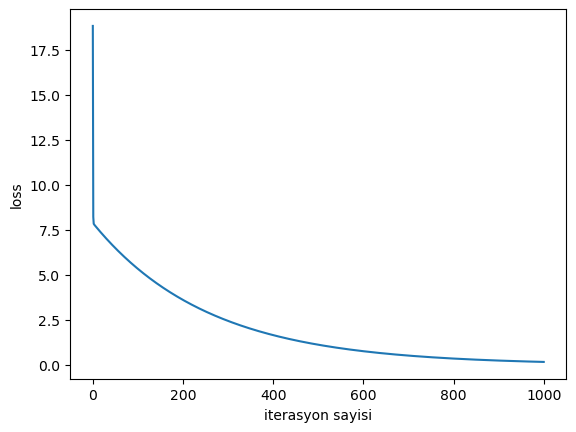

In [84]:
plt.plot(range(iterasyon_Sayisi), loss_list)
plt.xlabel("iterasyon sayisi")
plt.ylabel("loss")
plt.show()

7. **Eğitilmiş modeli kullanarak, arabaların fiyatlarını tahmin edilmesi**:
   - Şimdi eğitilmiş bir modele sahibiz.
   - Eğitilmiş modeli kullanarak, arabaların fiyatlarını tahmin edelim

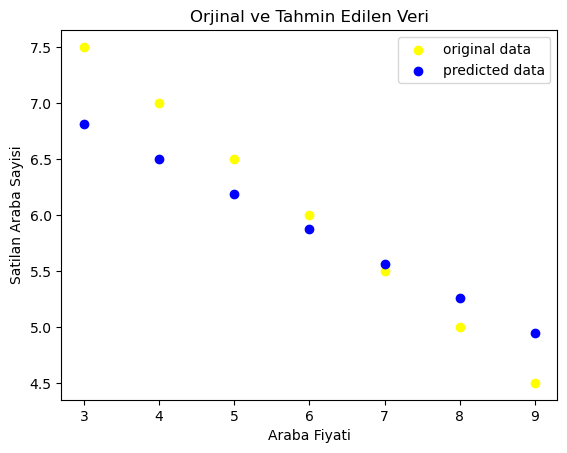

In [85]:
predicted = model(araba_fiyatlari_tensor).data.numpy()
plt.scatter(araba_fiyatlari_tensor,satilan_araba_sayisi,label = "original data",color ="yellow")
plt.scatter(araba_fiyatlari,predicted,label = "predicted data",color ="blue")
plt.legend()
plt.xlabel("Araba Fiyati")
plt.ylabel("Satilan Araba Sayisi")
plt.title("Orjinal ve Tahmin Edilen Veri")
plt.show()